In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import cv2

# Training data

#### Count # of video in training data

In [2]:
PATH = 'E:/EmotiW2017/lstm/Train_AFEW'

n_vids_train = 0

for emo in os.listdir(PATH):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in os.listdir(full_emo):
            full_vid = full_emo + '/' + vid
            
            n_vids_train += 1

print(' > %d videos found' % (n_vids_train))

 > 773 videos found


#### Count # of frames in each video in training data

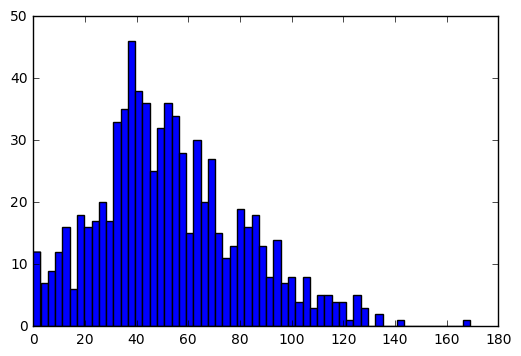

In [3]:
n_fra_stat_train = np.zeros((n_vids_train, 1))

vid_indx = 0

for emo in os.listdir(PATH):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in os.listdir(full_emo):
            full_vid = full_emo + '/' + vid
            for fra in os.listdir(full_vid):
                full_fra = full_vid + '/' + fra
                if os.path.isfile(full_fra):
                    n_fra_stat_train[vid_indx, 0] += 1
                    
            vid_indx += 1

plt.hist(n_fra_stat_train, bins=60)
plt.show()

In [4]:
print(np.average(n_fra_stat_train))
print(stats.mode(n_fra_stat_train))

53.3311772316
ModeResult(mode=array([[ 39.]]), count=array([[18]]))


# Validation data

In [5]:
PATH = 'E:/EmotiW2017/lstm/Val_AFEW'

n_vids_test = 0

for emo in os.listdir(PATH):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in os.listdir(full_emo):
            full_vid = full_emo + '/' + vid
            
            n_vids_test += 1

print(' > %d videos found' % (n_vids_test))

 > 383 videos found


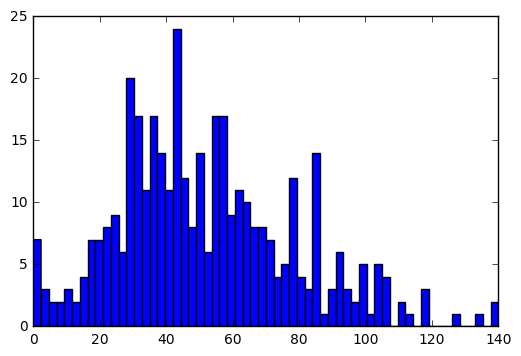

In [6]:
n_fra_stat_test = np.zeros((n_vids_test, 1))

vid_indx = 0

for emo in os.listdir(PATH):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in os.listdir(full_emo):
            full_vid = full_emo + '/' + vid
            for fra in os.listdir(full_vid):
                full_fra = full_vid + '/' + fra
                if os.path.isfile(full_fra):
                    n_fra_stat_test[vid_indx, 0] += 1
                    
            vid_indx += 1

plt.hist(n_fra_stat_test, bins=60)
plt.show()

In [7]:
print(np.average(n_fra_stat_test))
print(stats.mode(n_fra_stat_test))

51.8825065274
ModeResult(mode=array([[ 54.]]), count=array([[11]]))


# Data processing

In [8]:
# We will process maxToAdd frames each video to recognize facial expression
maxToAdd = 24
batch_size = 128
n_epochs = 20
size = 48

In [9]:
def emo2int(emo):
    if emo == 'Angry':
        return 0
    elif emo == 'Disgust':
        return 1
    elif emo == 'Fear':
        return 2
    elif emo == 'Happy':
        return 3
    elif emo == 'Neutral':
        return 4
    elif emo == 'Sad':
        return 5
    else:
        return 6

#### Training data

X_train shape:  (773, 24, 48, 48, 1)
y_train shape:  (773,)


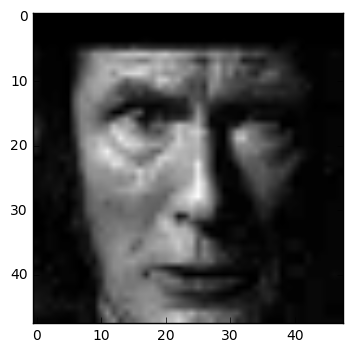

In [10]:
X_train = []
y_train = []

X_train = np.zeros((n_vids_train, maxToAdd, size, size, 1))

PATH = 'E:/EmotiW2017/lstm/Train_AFEW'

vid_indx = 0

for emo in os.listdir(PATH):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in os.listdir(full_emo):
            full_vid = full_emo + '/' + vid
            
            # Initialize a training example of max_num_time_steps, im_size, im_size
            output = np.zeros((maxToAdd, size, size, 1))
            
            # Decide how many images to put in that tensor
            numToAdd = int(np.min((maxToAdd, n_fra_stat_train[vid_indx, 0])))
            
            # Sample that images
            fra_indx = 0
            example = np.zeros((numToAdd, size, size))
            for fra in os.listdir(full_vid):
                if fra_indx < numToAdd:
                    full_fra = full_vid + '/' + fra
                    if os.path.isfile(full_fra):
                        img = cv2.imread(full_fra)
                        img = cv2.resize(img, (size, size))
                        img = img[:, :, 0]
                        example[fra_indx] = img
                        
                        fra_indx += 1
                else:
                    break
            
            output[0:numToAdd, :, :, 0] = example
            X_train[vid_indx, :, :, :, :] = output
            
            # Get the label for current video
            y_train.append(emo2int(emo))
                
            vid_indx += 1

y_train = np.array(y_train)

print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

plt.imshow(X_train[0, 0, :, :, 0], cmap='gray')
plt.show()

#### Validation data

X_test shape:  (383, 24, 48, 48, 1)
y_test shape:  (383,)


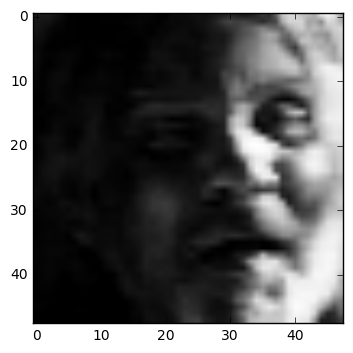

In [11]:
X_test = []
y_test = []

X_test = np.zeros((n_vids_test, maxToAdd, size, size, 1))

PATH = 'E:/EmotiW2017/lstm/Val_AFEW'

vid_indx = 0

for emo in os.listdir(PATH):
    full_emo = PATH + '/' + emo
    if os.path.isdir(full_emo):
        for vid in os.listdir(full_emo):
            full_vid = full_emo + '/' + vid
            
            # Initialize a testing example of max_num_time_steps, im_size, im_size
            output = np.zeros((maxToAdd, size, size, 1))
            
            # Decide how many images to put in that tensor
            numToAdd = int(np.min((maxToAdd, n_fra_stat_test[vid_indx, 0])))
            
            # Sample that images
            fra_indx = 0
            example = np.zeros((numToAdd, size, size))
            for fra in os.listdir(full_vid):
                if fra_indx < numToAdd:
                    full_fra = full_vid + '/' + fra
                    if os.path.isfile(full_fra):
                        img = cv2.imread(full_fra)
                        img = cv2.resize(img, (size, size))
                        img = img[:, :, 0]
                        example[fra_indx] = img
                        
                        fra_indx += 1
                else:
                    break
            
            output[0:numToAdd, :, :, 0] = example
            X_test[vid_indx, :, :, :, :] = output
            
            # Get the label for current video
            y_test.append(emo2int(emo))
                
            vid_indx += 1

y_test = np.array(y_test)

print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)

plt.imshow(X_test[0, 0, :, :, 0], cmap='gray')
plt.show()